# CS168 P1 Part 1

## The Power of Two Choices
**Description** : We consider random processes of the following type: there are N bins, and we throw N balls into them, one by one. We’ll compare four different strategies for choosing the bin in which to place a given ball.


**First approach**

1. Select one of the N bins uniformly at random, and place the current ball in it.

In [1]:
import numpy as np
import random
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt

In [76]:
"""
    Implements first approach
    returns numpy array where each number corresponds to amount of balls in bin
"""
def first_way(N):
    bins = np.zeros(N)
    for count in range(N):
        bin_index = np.random.randint(N)
        bins[bin_index] += 1
    return bins

**Second approach**
2. Select two of the N bins uniformly at random (either with or without replacement), and look at how many balls are already in each. If one bin has strictly fewer balls than the other, place the current ball in that bin. If both bins have the same number of balls, pick one of the two at random and place the current ball in it.


In [77]:
"""
    Implements second approach
    returns numpy array where each number corresponds to amount of balls in bin
"""
def replacement_logic_2(N):
    index_1 = 0
    index_2 = 0
    while(index_1 == index_2):
        index_1 = np.random.randint(N)
        index_2 = np.random.randint(N)
    return index_1, index_2
    
def second_way(N, replacement_flag = False):
    bins = np.zeros(N)
    for count in range(N):
        if (replacement_flag == True):
            first_bin_index, second_bin_index = replacement_logic_2(N)
        else:
            first_bin_index = np.random.randint(N)
            second_bin_index = np.random.randint(N)
        
        if (bins[first_bin_index] < bins[second_bin_index]):
            bins[first_bin_index] += 1
        elif(bins[second_bin_index] < bins[first_bin_index]):
            bins[second_bin_index] += 1
        else:
            # perform random choose between two bins
            indices = [first_bin_index, second_bin_index]
            index = indices[np.random.randint(2)]
            bins[index] += 1
    return bins

**Third Approach**
3. Same as the previous strategy, except choosing three bins at random rather than two.


In [120]:
"""
    Implements third approach
    returns numpy array where each number corresponds to amount of balls in bin
"""
def third_way(N, replacement_flag = False):
    bins = np.zeros(N)
    for count in range(N):
        if (replacement_flag == True):
            indices = np.random.choice(N, 3, replace=False)
        else:
            indices = [np.random.randint(N) for i in range(3)]
        elements = bins[indices]
        if (len(set(elements)) == 1):
            index = indices[np.random.randint(3)]
            bins[index] += 1
        elif (len(set(elements)) == 2):
            value, _ = Counter(elements).most_common()[0]
            two_indices = []
            for i in range(3):
                if (elements[i] == value):
                    two_indices.append(indices[i])
            bins[two_indices[np.random.randint(2)]] += 1    
        else:
            index = indices[np.argmin(elements)]
            bins[index] += 1
    return bins

In [145]:
np.random.choice(N, 3, replace=False)

array([ 93147, 175214, 117909])

**Fourth Approach**
4. Select two bins as follows: the first bin is selected uniformly from the first N/2 bins, and the second uniformly from the last N/2 bins. (You can assume that N is even.) If one bin has strictly fewer balls than the other, place the current ball in that bin. If both bins have the same number of balls, place the current ball (deterministically) in the first of the two bins.


In [117]:
"""
    Implements fourth approach
    returns numpy array where each number corresponds to amount of balls in bin
"""
def fourth_way(N):
    bins = np.zeros(N)
    for count in range(N):
        first_bin_index = np.random.randint(0, N / 2)
        second_bin_index = np.random.randint(N / 2, N)
        if (bins[first_bin_index] < bins[second_bin_index]):
            bins[first_bin_index] += 1
        elif(bins[second_bin_index] < bins[first_bin_index]):
            bins[second_bin_index] += 1
        else:
            # pre-deterministic choose
            bins[first_bin_index] += 1 
            
    return bins

### Evaluation Part

In [147]:
"""
    'approach' - one of functions above
"""
N = 200000
steps = 30

def evaluate_approach(approach, flag = None):
    results = []
    for i in tqdm(range(steps)):
        if (flag != None):
            bins = approach(N, flag)
        else:
            bins = approach(N)
        x = bins.max()
        results.append(int(x))
    return results

### First approach

In [106]:
result_1 = evaluate_approach(first_way)

100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


(array([ 4.,  0.,  0., 21.,  0.,  0.,  4.,  0.,  0.,  1.]),
 array([ 7. ,  7.3,  7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. ]),
 <a list of 10 Patch objects>)

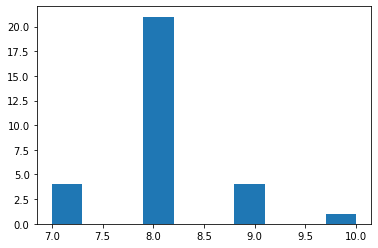

In [107]:
plt.hist(result_1)

### Second Approach

*With replacement* \
Another words we always choose two different indices

In [148]:
result_2 = evaluate_approach(second_way, flag = True)

100%|██████████| 30/30 [01:37<00:00,  3.24s/it]


(array([ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 21.]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ]),
 <a list of 10 Patch objects>)

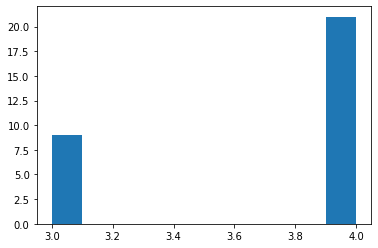

In [131]:
plt.hist(result_2)

*Without replacement* \
We may choose two same indices

100%|██████████| 30/30 [01:29<00:00,  2.99s/it]


(array([ 7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ]),
 <a list of 10 Patch objects>)

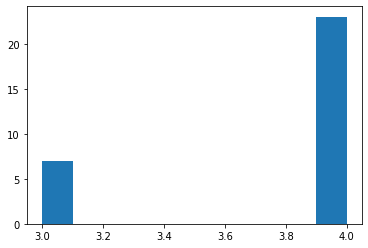

In [150]:
result_2_2 = evaluate_approach(second_way, flag = False)
plt.hist(result_2_2)

### Third Approach

In [110]:
result_3 = evaluate_approach(third_way)

100%|██████████| 30/30 [03:24<00:00,  6.81s/it]


(array([ 0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.]),
 array([3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5]),
 <a list of 10 Patch objects>)

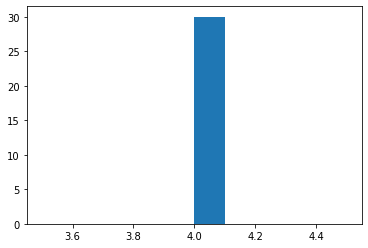

In [111]:
plt.hist(result_3)

### Fourth Approach

In [118]:
result_4 = evaluate_approach(fourth_way)

100%|██████████| 30/30 [01:16<00:00,  2.56s/it]


(array([ 0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
 <a list of 10 Patch objects>)

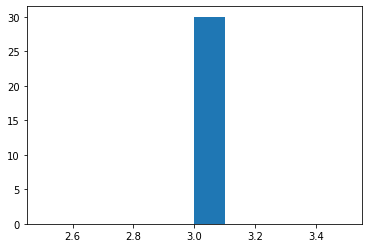

In [119]:
plt.hist(result_4)